# PASSO 1: Carregar e Formatar Dataset

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Markdown


In [2]:
import chardet

# Detectar a codificação do arquivo
with open("novo_SPAECE_2018.csv", 'rb') as f:
    result = chardet.detect(f.read())

# Carregar o arquivo CSV com a codificação detectada
encoding = result['encoding']
gnetDf = pd.read_csv("novo_SPAECE_2018.csv", encoding=encoding)

In [3]:
pd.set_option('display.max_columns', None)

def count_decimal_places(num):
    str_num = str(num)
    if '.' in str_num:
        return len(str_num) - str_num.index('.') - 1
    else:
        return 0

pd.set_option('display.float_format', lambda x: '{:.{}f}'.format(x, min(count_decimal_places(x), 6)))

def pd_insert_beside(gnetDf, column_name, value):
    gnetDf.insert(gnetDf.columns.get_loc(value.name) + 1, column_name, value)

In [4]:
gnetDf

,SEXO,IDADE,FORMA��O DA M�E,FORMA��O DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GEST�O ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEM�TICA
0,Feminino,17 anos,N�o sabe informar,Ensino Fundamental Completo,N�o,Um,Na creche (0 a 3 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo,Concordo,Tarde,11,8,"252,9","285,73"
1,Feminino,18 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo muito,Concordo muito,Tarde,16,9,"281,74","306,3"
2,Feminino,17 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo muito,Concordo,Concordo,Tarde,8,5,"224,17","243,4"
3,Feminino,17 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na creche (0 a 3 anos),Em escola p�blica e em escola particular,N�o,N�o,Concordo pouco,Concordo pouco,Concordo pouco,Tarde,17,6,"281,61","268,13"
4,Masculino,17 anos,Nunca estudou,Ensino Fundamental Completo,N�o,Um,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo,Concordo,Tarde,18,5,"301,68","240,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,Feminino,17 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,No 1� Ano / 1� s�rie do Ensino Fundamental (6 ...,Somente em escola particular,N�o,"Sim, uma vez",N�o concordo,Concordo pouco,Concordo pouco,Integral,13,7,"275,88","259,11"
52490,Feminino,19 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,Na pr�-escola (4 a 5 anos),Em escola p�blica e em escola particular,N�o,N�o,Concordo muito,Concordo muito,Concordo muito,Integral,22,8,"335,27","304,96"
52491,Masculino,19 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,"Sim, uma vez",Concordo muito,Concordo,Concordo pouco,Integral,22,6,"334,7","251,84"
52492,Masculino,18 anos,Ensino Fundamental Completo,N�o sabe informar,Sim,Dois ou mais,Na pr�-escola (4 a 5 anos),Somente em escola p�blica,N�o,N�o,Concordo,Concordo,Concordo,Integral,20,8,"323,7","261,49"


In [5]:
# Listar os nomes das colunas para verificação
print(gnetDf.columns)


Index(['SEXO', 'IDADE', 'FORMA��O DA M�E', 'FORMA��O DO PAI ',
       'ACESSO A INTERNET', 'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS',
       'CURSO O ENSINO FUNDAMENTAL', 'REPROVOU', 'ABANDONOU A  ESCOLA',
       'GEST�O ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE',
       'PROFESSORES TIRAM DUVIDAS ', 'PROFESSORES CORRIGEM AS ATIVIDADES ',
       'TURNO ESCOLAR', 'NUMERO DE PONTOS EM PORTUGUES ',
       'NUMERO DE PONTOS EM MATEMATICA', 'PROFICIENCIA EM PORTUGUES',
       'PROFICIENCIA EM MATEM�TICA'],
      dtype='object')


In [6]:
# Renomear colunas para corrigir possíveis problemas de codificação

gnetDf.rename(columns={
    'SEXO': 'SEXO',
    'IDADE': 'IDADE',
    'FORMA��O DA M�E': 'FORMACAO DA MAE',
    'FORMA��O DO PAI ': 'FORMACAO DO PAI',
    'ACESSO A INTERNET': 'ACESSO A INTERNET',
    'NÚMERO DE COMPUTADORES': 'NUMERO DE COMPUTADORES',
    'INICIOU OS ESTUDOS': 'INICIOU OS ESTUDOS',
    'CURSO O ENSINO FUNDAMENTAL': 'CURSO O ENSINO FUNDAMENTAL',
    'REPROVOU': 'REPROVOU',
    'ABANDONOU A  ESCOLA': 'ABANDONOU A ESCOLA',
    'GEST�O ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE': 'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE',
    'PROFESSORES TIRAM DUVIDAS ': 'PROFESSORES TIRAM DUVIDAS',
    'PROFESSORES CORRIGEM AS ATIVIDADES ': 'PROFESSORES CORRIGEM AS ATIVIDADES',
    'TURNO ESCOLAR': 'TURNO ESCOLAR',
    'NUMERO DE PONTOS EM PORTUGUES ': 'NUMERO DE PONTOS EM PORTUGUES',
    'NUMERO DE PONTOS EM MATEMATICA': 'NUMERO DE PONTOS EM MATEMATICA',
    'PROFICIENCIA EM PORTUGUES': 'PROFICIENCIA EM PORTUGUES',
    'PROFICIENCIA EM MATEM�TICA': 'PROFICIENCIA EM MATEMATICA'
}, inplace=True)

In [7]:
# Verificar novamente os nomes das colunas após renomear
print(gnetDf.columns)

Index(['SEXO', 'IDADE', 'FORMACAO DA MAE', 'FORMACAO DO PAI',
       'ACESSO A INTERNET', 'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS',
       'CURSO O ENSINO FUNDAMENTAL', 'REPROVOU', 'ABANDONOU A ESCOLA',
       'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE',
       'PROFESSORES TIRAM DUVIDAS', 'PROFESSORES CORRIGEM AS ATIVIDADES',
       'TURNO ESCOLAR', 'NUMERO DE PONTOS EM PORTUGUES',
       'NUMERO DE PONTOS EM MATEMATICA', 'PROFICIENCIA EM PORTUGUES',
       'PROFICIENCIA EM MATEMATICA'],
      dtype='object')


# PASSO 2: Codificar os valores textuais para valores numéricos.

In [8]:
# Dicionários de mapeamento
sexo_mapping = {
    'Feminino': 1,
    'Masculino': 2
}

idade_mapping = {
    '17 anos': 17,
    '18 anos': 18,
    '19 anos': 19,
    '20 anos ou mais': 20
}

formacao_mae_mapping = {
    'Ensino Fundamental Completo': 3,
    'Ensino Fundamental Incompleto': 2,
    'Ensino M�dio Completo': 4,
    'Ensino Superior Completo': 5,
    'Nunca estudou': 0,
    'N�o sabe informar': 1
}

formacao_pai_mapping = formacao_mae_mapping.copy()

acesso_internet_mapping = {
    'N�o': 0,
    'Sim': 1
}

numero_computadores_mapping = {
    'Dois ou mais': 2,
    'Nenhum': 0,
    'Um': 1
}

inicio_estudos_mapping = {
    'Depois do 1� Ano do Ensino Fundamental (8 anos ou mais)': 9,
    'Na creche (0 a 3 anos)': 3,
    'Na pr�-escola (4 a 5 anos)': 5,
    'No 1� Ano / 1� s�rie do Ensino Fundamental (6 a 7 anos)': 7
}

curso_ensino_fundamental_mapping = {
    'Em escola p�blica e em escola particular': 3,
    'Somente em escola particular': 2,
    'Somente em escola p�blica': 1
}

reprovou_mapping = {
    'N�o': 0,
    'Sim, duas vezes ou mais': 2,
    'Sim, uma vez': 1
}

abandonou_escola_mapping = reprovou_mapping.copy()

gestao_escolar_mapping = {
    'Concordo': 2,
    'Concordo muito': 3,
    'Concordo pouco': 1,
    'N�o concordo': 0
}

professores_tiram_duvidas_mapping = gestao_escolar_mapping.copy()
professores_corrigem_atividades_mapping = gestao_escolar_mapping.copy()

turno_escolar_mapping = {
    'Integral': 4,
    'Manh�': 1,
    'Noite': 3,
    'Tarde': 2
}


##### Colunas codificadas de acordo com o documento "Codificação.pdf"

In [9]:
# Aplicar os mapeamentos
gnetDf['SEXO'] = gnetDf['SEXO'].map(sexo_mapping)
gnetDf['IDADE'] = gnetDf['IDADE'].map(idade_mapping)
gnetDf['FORMACAO DA MAE'] = gnetDf['FORMACAO DA MAE'].map(formacao_mae_mapping)
gnetDf['FORMACAO DO PAI'] = gnetDf['FORMACAO DO PAI'].map(formacao_pai_mapping)
gnetDf['ACESSO A INTERNET'] = gnetDf['ACESSO A INTERNET'].map(acesso_internet_mapping)
gnetDf['NUMERO DE COMPUTADORES'] = gnetDf['NUMERO DE COMPUTADORES'].map(numero_computadores_mapping)
gnetDf['INICIOU OS ESTUDOS'] = gnetDf['INICIOU OS ESTUDOS'].map(inicio_estudos_mapping)
gnetDf['CURSO O ENSINO FUNDAMENTAL'] = gnetDf['CURSO O ENSINO FUNDAMENTAL'].map(curso_ensino_fundamental_mapping)
gnetDf['REPROVOU'] = gnetDf['REPROVOU'].map(reprovou_mapping)
gnetDf['ABANDONOU A ESCOLA'] = gnetDf['ABANDONOU A ESCOLA'].map(abandonou_escola_mapping)
gnetDf['GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE'] = gnetDf['GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE'].map(gestao_escolar_mapping)
gnetDf['PROFESSORES TIRAM DUVIDAS'] = gnetDf['PROFESSORES TIRAM DUVIDAS'].map(professores_tiram_duvidas_mapping)
gnetDf['PROFESSORES CORRIGEM AS ATIVIDADES'] = gnetDf['PROFESSORES CORRIGEM AS ATIVIDADES'].map(professores_corrigem_atividades_mapping)
gnetDf['TURNO ESCOLAR'] = gnetDf['TURNO ESCOLAR'].map(turno_escolar_mapping)

# Salvar o DataFrame codificado
gnetDf.to_csv("SPAECE_2018_codificado.csv", index=False)

In [10]:
gnetDf

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,"252,9","285,73"
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,"281,74","306,3"
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,"224,17","243,4"
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,"281,61","268,13"
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,"301,68","240,28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,"275,88","259,11"
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,"335,27","304,96"
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,"334,7","251,84"
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,"323,7","261,49"


In [11]:
# Note que as duas últimas colunas estão no formato errado e as casas decimais dos números estão separados por vírgula. Precisamos consertar.
print(gnetDf.dtypes)

SEXO                                                          int64
IDADE                                                         int64
FORMACAO DA MAE                                               int64
FORMACAO DO PAI                                               int64
ACESSO A INTERNET                                             int64
NUMERO DE COMPUTADORES                                        int64
INICIOU OS ESTUDOS                                            int64
CURSO O ENSINO FUNDAMENTAL                                    int64
REPROVOU                                                      int64
ABANDONOU A ESCOLA                                            int64
GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE     int64
PROFESSORES TIRAM DUVIDAS                                     int64
PROFESSORES CORRIGEM AS ATIVIDADES                            int64
TURNO ESCOLAR                                                 int64
NUMERO DE PONTOS EM PORTUGUES                   

In [12]:
# Formatando colunas
gnetDf['PROFICIENCIA EM PORTUGUES'] = gnetDf['PROFICIENCIA EM PORTUGUES'].str.replace(',', '.').astype(float)
gnetDf['PROFICIENCIA EM MATEMATICA'] = gnetDf['PROFICIENCIA EM MATEMATICA'].str.replace(',', '.').astype(float)


In [13]:
# Verificando colunas novamente
print(gnetDf.dtypes)

SEXO                                                           int64
IDADE                                                          int64
FORMACAO DA MAE                                                int64
FORMACAO DO PAI                                                int64
ACESSO A INTERNET                                              int64
NUMERO DE COMPUTADORES                                         int64
INICIOU OS ESTUDOS                                             int64
CURSO O ENSINO FUNDAMENTAL                                     int64
REPROVOU                                                       int64
ABANDONOU A ESCOLA                                             int64
GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE      int64
PROFESSORES TIRAM DUVIDAS                                      int64
PROFESSORES CORRIGEM AS ATIVIDADES                             int64
TURNO ESCOLAR                                                  int64
NUMERO DE PONTOS EM PORTUGUES     

In [14]:
# Verificando valores com casas decimais
gnetDf

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,252.9,285.73
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,281.74,306.3
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,224.17,243.4
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,281.61,268.13
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,301.68,240.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,275.88,259.11
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,335.27,304.96
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,334.7,251.84
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,323.7,261.49


# PASSO 3: Explorar e visualizar os dados

In [15]:
# Verifique quais colunas têm dados faltantes
colunas_faltantes = []
for coluna in gnetDf.columns:
    if gnetDf[coluna].isnull().any():
        colunas_faltantes.append(coluna)

# Exiba as colunas com dados faltantes
print(colunas_faltantes)

[]


##### Todas as colunas estão completas

In [16]:
# Para verificar a porcentagem de dados faltantes de uma coluna
coluna_desejada = 'IDADE'

# Calcule a porcentagem de valores faltantes ou nulos
porcentagem_faltantes = gnetDf[coluna_desejada].isnull().mean() * 100

# Exiba a porcentagem de valores faltantes ou nulos
print(f"Porcentagem de valores faltantes ou nulos na coluna {coluna_desejada}: {porcentagem_faltantes:.2f}%")

Porcentagem de valores faltantes ou nulos na coluna IDADE: 0.00%


In [17]:
# Para visualizar uma coluna
print(gnetDf['SEXO'])

0        1
1        1
2        1
3        1
4        2
        ..
52489    1
52490    1
52491    2
52492    2
52493    2
Name: SEXO, Length: 52494, dtype: int64


In [18]:
# Para verificar o número de colunas e instâncias
print('Number of Rows (Samples): %s' % str((gnetDf.shape[0])))
print('Number of Columns (Features): %s' % str((gnetDf.shape[1])))

Number of Rows (Samples): 52494
Number of Columns (Features): 18


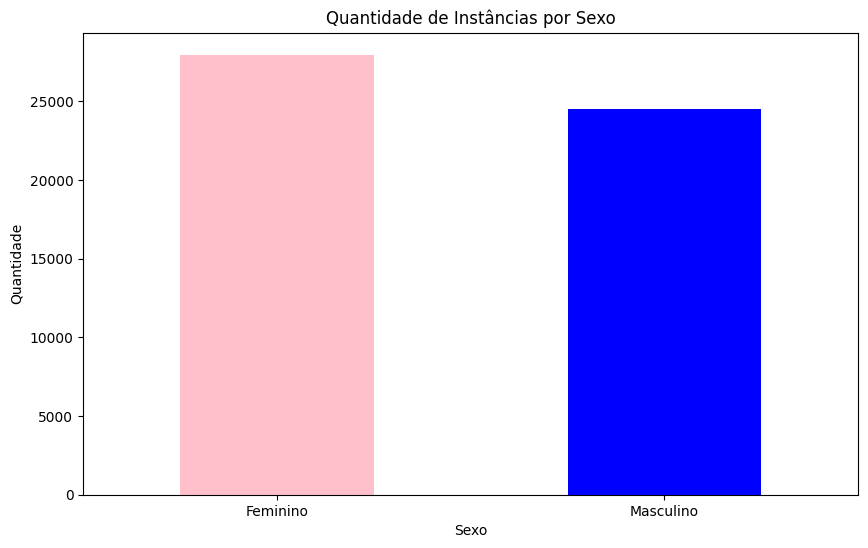

In [19]:

# Contar o número de instâncias de cada tipo na coluna 'SEXO'
sexo_counts = gnetDf['SEXO'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sexo_counts.plot(kind='bar', color=['pink', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Quantidade de Instâncias por Sexo')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'], rotation=0)
plt.show()

##### Analisar a relação entre as colunas e identificar quais atributos geram maior dispersão. Dados mais dispersos têm maior peso no treinamento de MLs. Os dados de Sexo acime possuem baixa dispersão (apenas valores bináros 0 ou 1), logo possuem pouca ou nenhuma relevância para nossa ML.

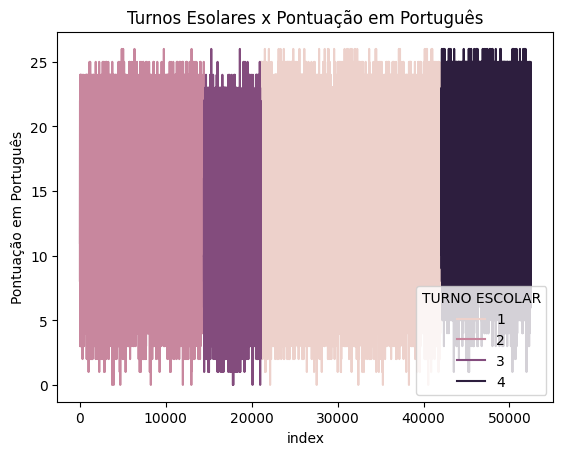

In [20]:
g = sns.lineplot(data=gnetDf.reset_index(), x='index', y='NUMERO DE PONTOS EM PORTUGUES', hue='TURNO ESCOLAR') # Podemos Ajustar os dados de x e y para visualizar a relação dos dados.
g.set(ylabel='Pontuação em Português')
g.set_title('Turnos Esolares x Pontuação em Português');

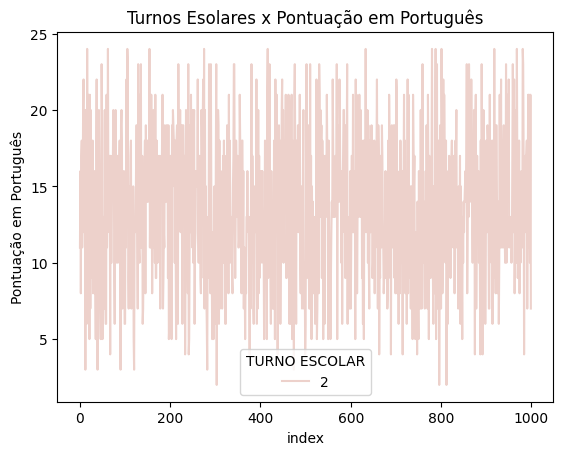

In [21]:
# Para analisar trechos do bloco, basta ajustar os valores de [100:1000] (das instâncias 100 até 1000 por exemplo)
g = sns.lineplot(data=gnetDf.reset_index()[:1000], x='index', y='NUMERO DE PONTOS EM PORTUGUES', hue='TURNO ESCOLAR') # x='COLUNA' y='COLUNA' hue='Filtro'
g.set(ylabel='Pontuação em Português')  # Rótulo do eixo y
g.set_title('Turnos Esolares x Pontuação em Português'); # Título do gráfico

##### Dados como os de pontuação e proeficiência possuem uma dispersão muito maior. Como podemos Observar nos gráficos acima. Ao relacionar as colunas podemos observar quais atributos são os melhores candidatos para treinamento de Algoritmos. Este é um método de análise mais massante e uma das maneiras de seleção de atributos.

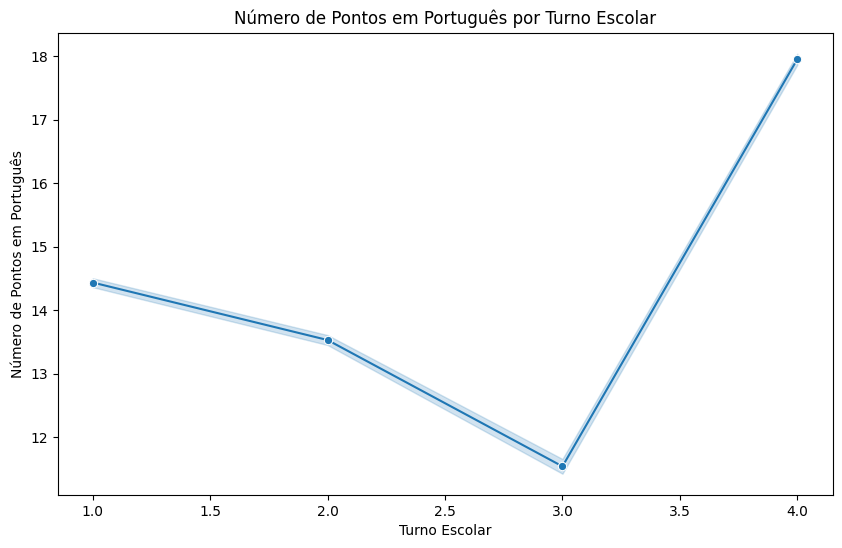

In [22]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='NUMERO DE PONTOS EM PORTUGUES', marker='o')
plt.title('Número de Pontos em Português por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Número de Pontos em Português')
plt.show()

##### No exemplo acima relacionamos o Turno Escolar com a Pontuação na prova de Português e observamos que os alunos de Turno Escolar 4 (Turno Integral) possuem uma média de pontuação maior que os demais Turnos.

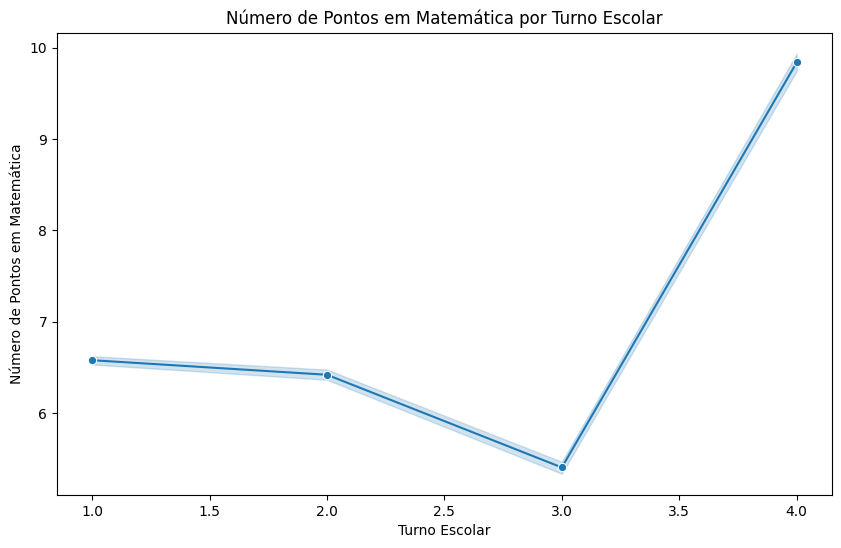

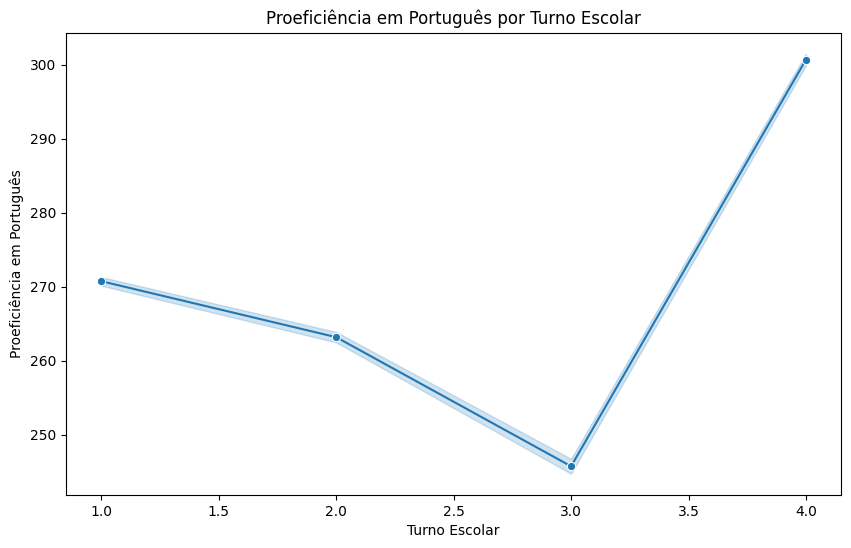

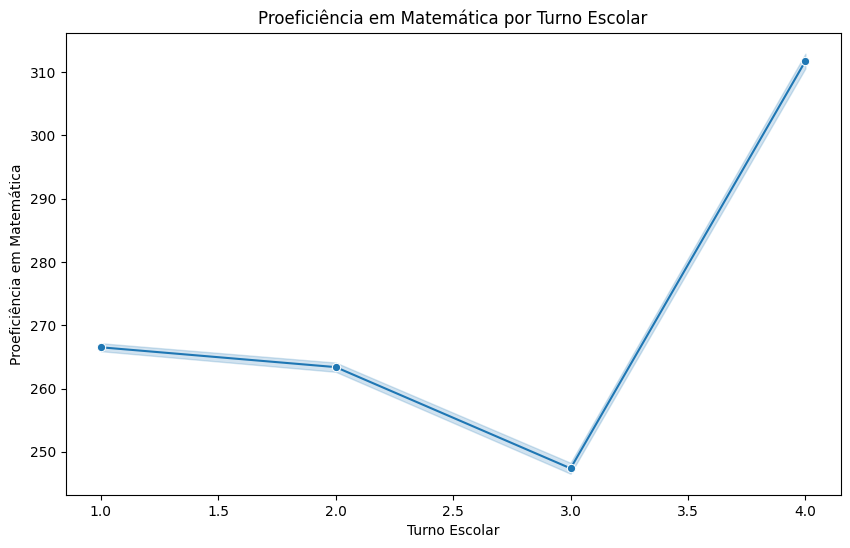

In [23]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='NUMERO DE PONTOS EM MATEMATICA', marker='o')
plt.title('Número de Pontos em Matemática por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Número de Pontos em Matemática')
plt.show()

# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='PROFICIENCIA EM PORTUGUES', marker='o')
plt.title('Proeficiência em Português por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Proeficiência em Português')
plt.show()

# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='TURNO ESCOLAR', y='PROFICIENCIA EM MATEMATICA', marker='o')
plt.title('Proeficiência em Matemática por Turno Escolar')
plt.xlabel('Turno Escolar')
plt.ylabel('Proeficiência em Matemática')
plt.show()

##### Como podemos observar acima, a situação se repete quando observamos os dados de Pontuação em Matemática e os dados de Proeficiência. Relações como esta são observadas pelo algoritmo de Aprendizagem de Máquina.

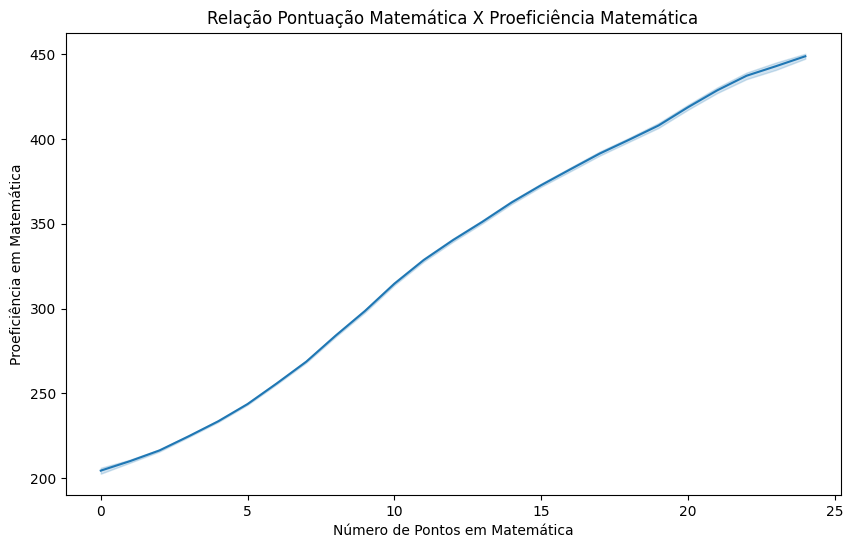

In [24]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='NUMERO DE PONTOS EM MATEMATICA', y='PROFICIENCIA EM MATEMATICA')
plt.title('Relação Pontuação Matemática X Proeficiência Matemática')
plt.xlabel('Número de Pontos em Matemática')
plt.ylabel('Proeficiência em Matemática')
plt.show()

##### Observe que se um dado de uma coluna está diretamente relacionado a outro, os dados são enviesados. Por exemplo: se a proeficiência em matemática é calculada com base na pontuação em matemática, estes dados podem estar enviesados. Pela lógica, se um aluno tirou nota alta em matemática então sua proeficiência também é descrita como alta. Enviesamento pode gerar erro na Acurácia e outros Scores do modelo.

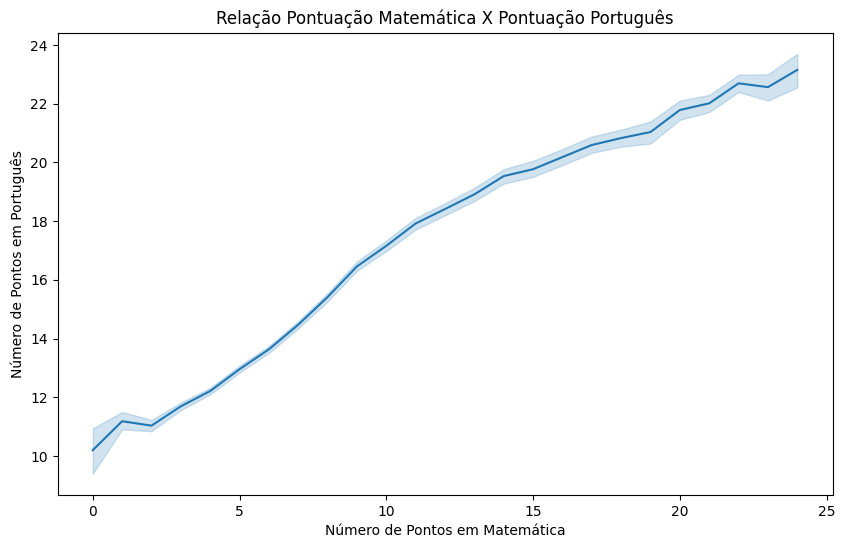

In [25]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='NUMERO DE PONTOS EM MATEMATICA', y='NUMERO DE PONTOS EM PORTUGUES')
plt.title('Relação Pontuação Matemática X Pontuação Português')
plt.xlabel('Número de Pontos em Matemática')
plt.ylabel('Número de Pontos em Português')
plt.show()

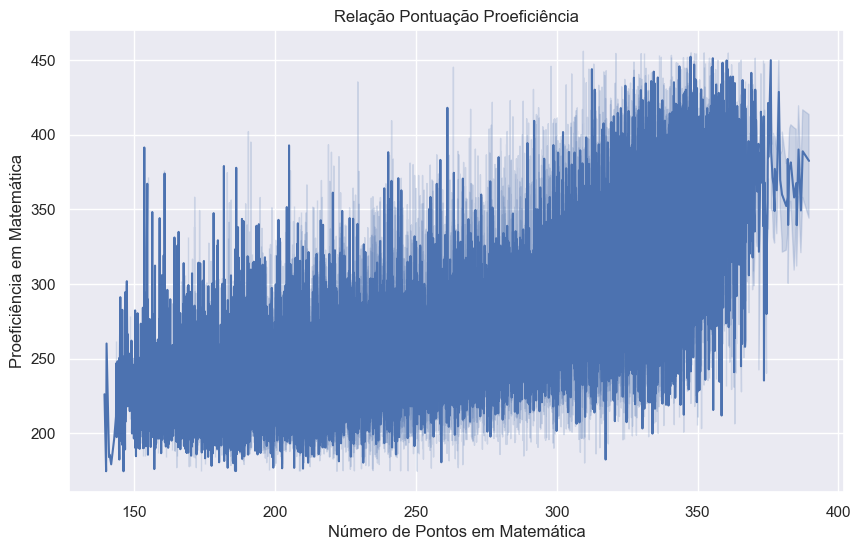

In [133]:
# Plotar o lineplot usando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=gnetDf, x='PROFICIENCIA EM PORTUGUES', y='PROFICIENCIA EM MATEMATICA')
plt.title('Relação Proeficiência Matemática X Proeficiência Português')
plt.xlabel('Proeficiência em Português')
plt.ylabel('Proeficiência em Matemática')
plt.show()

##### Podemos por exemplo, usar dados estes de pontuação e proeficiência como target de predição. Por exemplo 'proeficiência em matemática' e 'pontuação em português' para prever dados de 'pontuação matemática', descartando 'proeficiência em português' para diminuir riscos de viés.

##

## Abordagem 1: Observar a relação entre os dados e tentar realizar uma classificação multiclasse. Por exempo: com base nos dados de pontuações e o do questionario, prever em qual turno o aluno estuda. Podemos aplicar modelos como Arvore de Decisão, MLP, KNN, Naive Bayers.

## Abordagem 2: Observar a relação entre os dados e tentar realizar predições dos valores de pontuações e proeficiências. Por exemplo usar os dados dos questionarios e pontuação na disciplina 1 para prever a pontuação na disciplina 2. Podemos aplicar modelos como Arvore de Decisão, MLP, Regressão Linear, SVM.

#### - Ainda é necessário observar a contribuição que essas abordagens oferecem para a problemática ou para a computação.

##

# PASSO 4: Seleção das Features

##### - Se tivermos muitas features altamente correlacionadas podemos aplicar a Análise de Componentes Principais (PCA), o PCA pode ser usado para reduzir a dimensionalidade do conjunto de dados, mantendo a maior parte da variância original. As componentes principais resultantes podem ser consideradas as features mais relevantes.

##### - Algumas bibliotecas, como o scikit-learn, oferecem funcionalidades para selecionar automaticamente as features mais relevantes com base em diferentes critérios, como SelectKBest, SelectFromModel, entre outros.

##### - Modelos como Árvores de Decisão, Random Forest e Gradient Boosting possuem métodos embutidos para calcular a importância de cada feature no processo de decisão do modelo.

##### - Alguns modelos de aprendizado de máquina, como regressão linear com regularização L1 (Lasso) e L2 (Ridge), incluem termos de penalização que fazem com que as features menos importantes tenham coeficientes próximos de zero. Isso pode ajudar a identificar as features mais relevantes.



### Utilizando o método das Árvores de Decisão para seleção de Features

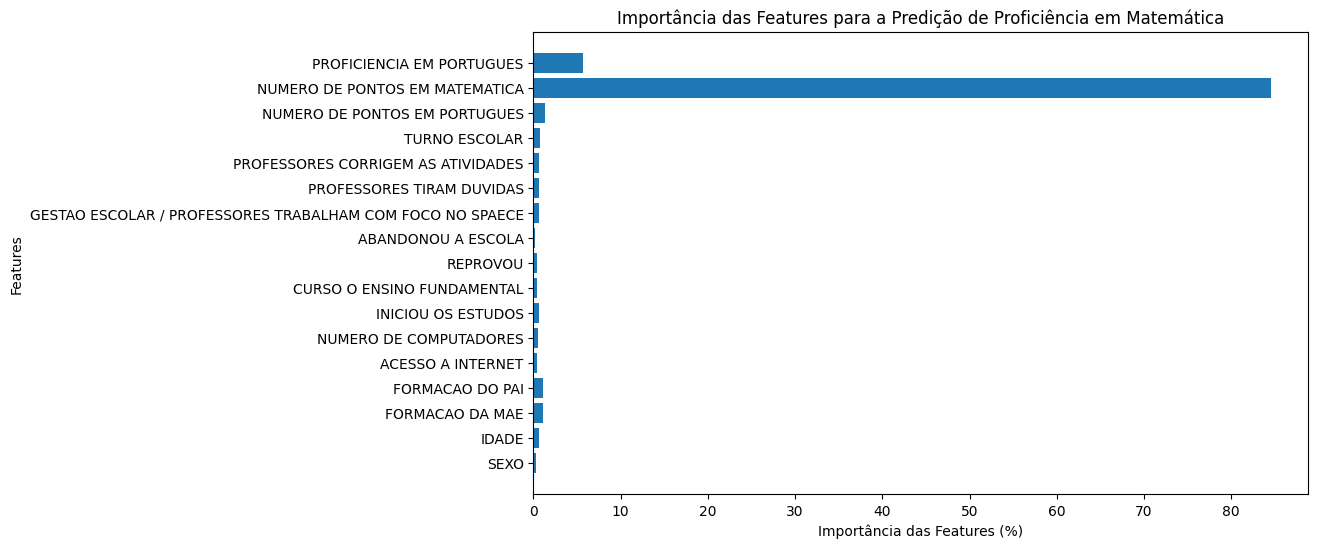

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Supondo que X é o seu conjunto de features e y é a variável target (PROFICIENCIA EM MATEMATICA)
X = gnetDf.drop(columns=['PROFICIENCIA EM MATEMATICA'])
y = gnetDf['PROFICIENCIA EM MATEMATICA']

# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de árvore de decisão para regressão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliação da importância das features
feature_importance = model.feature_importances_

import numpy as np

# Calcula a importância das features
feature_importance = model.feature_importances_

# Calcula a porcentagem relativa de cada importância
total_importance = np.sum(feature_importance)
relative_importance = (feature_importance / total_importance) * 100

# Visualização das importâncias das features em porcentagem
plt.figure(figsize=(10, 6))
plt.barh(X.columns, relative_importance)
plt.xlabel('Importância das Features (%)')
plt.ylabel('Features')
plt.title('Importância das Features para a Predição de Proficiência em Matemática')
plt.show()


##### A importância ou o peso de cada feature é dividida pela soma total de todas as importâncias para calcular a porcentagem relativa de cada feature. Em seguida, essas porcentagens relativas são usadas para criar o gráfico de barras horizontais. Isso irá mostrar a importância de cada feature em relação ao total em porcentagem.

##### - Observe que a feature 'NUMERO DE PONTOS EM MATEMATICA' possui impotância muito mais elevada que as demais. Como comentado anteriormente, este dado está diretamente relacionado a 'PROEFICIENCIA EM MATEMATICA', o que pode acabar gerando um viés. Esta coluna deve ser desconsiderada e o modelo retreinado.

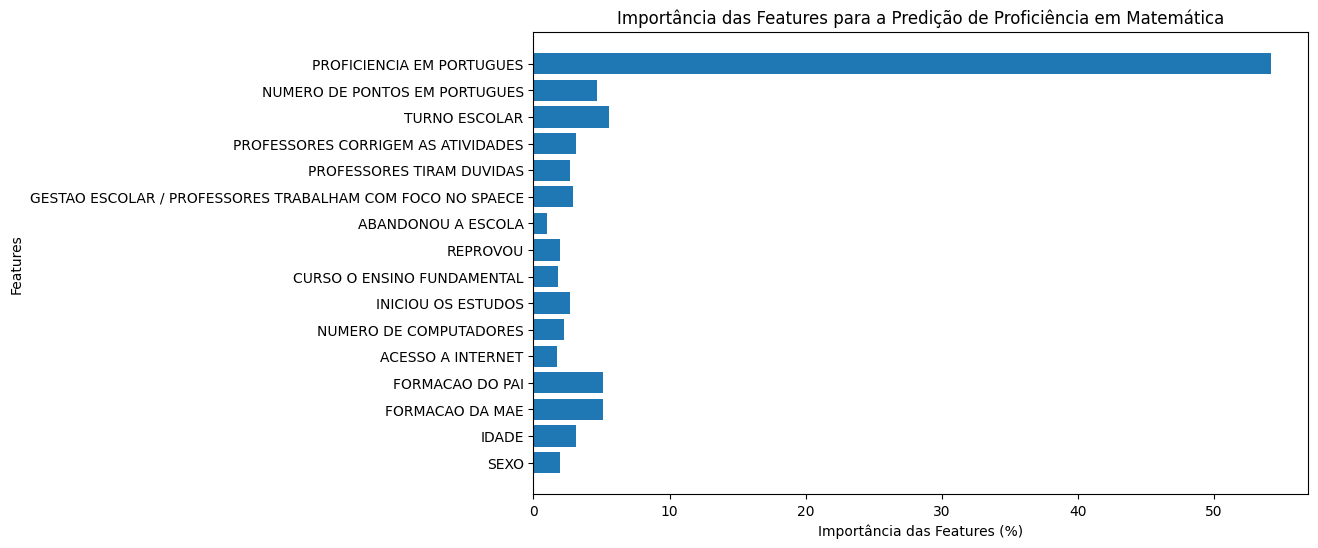

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Remover a coluna "NUMERO DE PONTOS EM MATEMATICA" do conjunto de features
X = gnetDf.drop(columns=['NUMERO DE PONTOS EM MATEMATICA', 'PROFICIENCIA EM MATEMATICA']) # Agora removemos a coluna 'NUMERO DE PONTOS EM MATEMATICA' que possui viés com nossa coluna target juntamente com a coluna target.
y = gnetDf['PROFICIENCIA EM MATEMATICA']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de árvore de decisão para regressão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliação da importância das features
feature_importance = model.feature_importances_

# Calcula a importância das features
feature_importance = model.feature_importances_

# Calcula a porcentagem relativa de cada importância
total_importance = np.sum(feature_importance)
relative_importance = (feature_importance / total_importance) * 100

# Visualização das importâncias das features em porcentagem
plt.figure(figsize=(10, 6))
plt.barh(X.columns, relative_importance)
plt.xlabel('Importância das Features (%)')
plt.ylabel('Features')
plt.title('Importância das Features para a Predição de Proficiência em Matemática')
plt.show()

##### Agora podemos observar a importância que cada feature teve na etapa de treinamento do modelo e selecionar as colunas desejadas para testar os Scores.

##### É possível observar os scores obtidos pelo modelo de regressão. Os scores comuns em modelos de regressão são o R² (coeficiente de determinação) e o RMSE (Root Mean Squared Error - Erro Quadrático Médio). O R² é uma medida da proporção da variância na variável dependente que é previsível a partir das variáveis independentes. O RMSE é uma medida da dispersão dos erros de previsão.

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o R²
r2 = r2_score(y_test, y_pred)

# Calcular o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

R²: -0.30352121397839005
RMSE: 60.28398830801657


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### - Este código calculará o R² e o RMSE com base nas previsões do modelo no conjunto de teste. Quanto mais próximo de 1 for o R² e quanto menor for o RMSE, melhor será o desempenho do modelo.

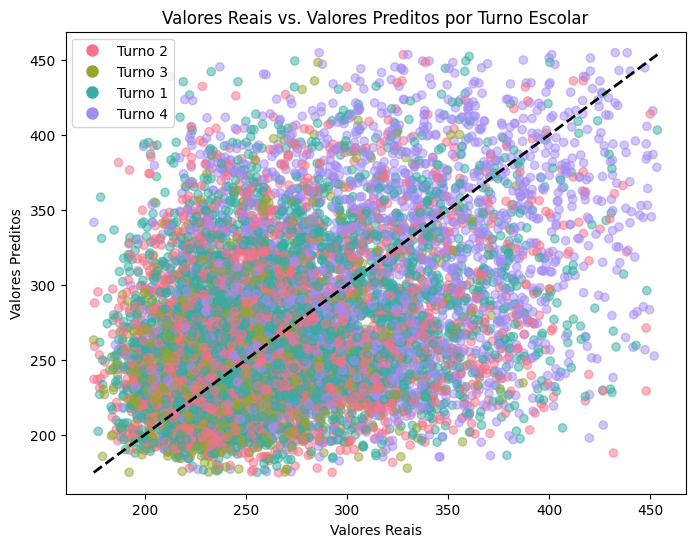

In [34]:
# Importar a biblioteca seaborn para obter paletas de cores
import seaborn as sns

# Criar uma paleta de cores com uma cor para cada TURNO ESCOLAR
palette = sns.color_palette("husl", len(gnetDf['TURNO ESCOLAR'].unique()))

# Criar um dicionário para mapear cada TURNO ESCOLAR para uma cor na paleta
turno_colors = {turno: cor for turno, cor in zip(gnetDf['TURNO ESCOLAR'].unique(), palette)}

# Criar uma lista de cores correspondentes aos TURNO ESCOLAR de cada amostra
colors = [turno_colors[turno] for turno in gnetDf.loc[y_test.index, 'TURNO ESCOLAR']]

# Plotar o gráfico de dispersão com legenda de cor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=colors, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos por Turno Escolar')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Turno {turno}') for turno, color in turno_colors.items()])
plt.show()

# Gráfico sem as legendas de cores.
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Valores Reais')
# plt.ylabel('Valores Preditos')
# plt.title('Valores Reais vs. Valores Preditos')
# plt.show()

##### Usamos a função scatter() para plotar os valores reais (y_test) no eixo x e os valores preditos (y_pred) no eixo y. Adicionamos uma linha de referência (linha preta tracejada) que representa a linha onde os valores reais e preditos seriam iguais. Isso nos ajuda a visualizar o quão bem o modelo está fazendo suas previsões. Logo quanto mais próximos da linha tracejada os pontos estiverem, mais precisa a predição do modelo. 

##### - Neste modelo usamos todas as features disponíveis, o que pode ter gerado penalidade nos Scores. Agora só temos que selecionar as melhores features e observar o novo resultado.